<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

c:\Users\Bluthund\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Bluthund\AppData\Local\Temp\ipykernel_31536\1554170796.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Task 1: Initial Data Exploration

In [2]:
df = pd.read_csv("supermarket_sales.csv")
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [3]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [4]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
# we notice that the date column is of type object but it should have be of type datetime
df["Date"]

0        1/5/19
1        3/8/19
2        3/3/19
3       1/27/19
4        2/8/19
         ...   
998     2/22/19
999     2/18/19
1000    2/18/19
1001    3/10/19
1002    1/26/19
Name: Date, Length: 1003, dtype: object

In [6]:
# the above are type strings, so lets convert them
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Bluthund\AppData\Local\Temp\ipykernel_31536\2032591180.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
df['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

In [8]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [9]:
# it is convetion to set the Date column as the index for the dataframe
df.set_index('Date', inplace= True)
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

In [10]:
# lets see quick some summary statistics about our dataframe
df.describe()

# this is done ONLY for the numeric or float columns

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               8.886215e-16     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

the max unit price - the max unit price among all customers is 99.96 and the mean is 55.76 and the min 10.08

## Task 2: Univariate Analysis

Looking at one variable at a time.

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

c:\Users\Bluthund\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


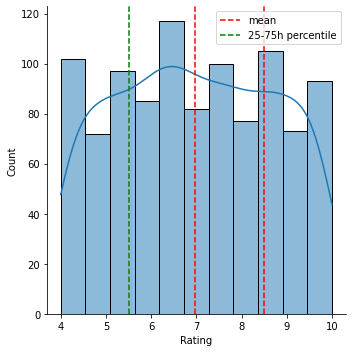

In [11]:
sns.displot(df['Rating'], kde=True)
plt.axvline(x=np.mean(df['Rating']), c = "red", ls= '--', label='mean')
plt.axvline(x=np.percentile(df['Rating'], 25), c = "green", ls= '--', label='25-75h percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c = "red", ls= '--')
plt.legend()

c:\Users\Bluthund\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


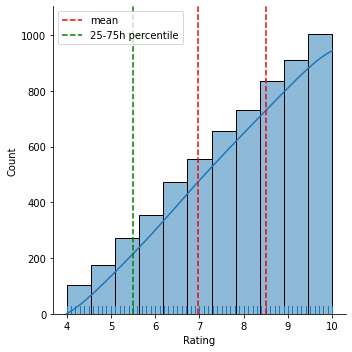

In [12]:
sns.displot(df['Rating'], kde=True, rug=True, cumulative=True)
plt.axvline(x=np.mean(df['Rating']), c = "red", ls= '--', label='mean')
plt.axvline(x=np.percentile(df['Rating'], 25), c = "green", ls= '--', label='25-75h percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), c = "red", ls= '--')
plt.legend()

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

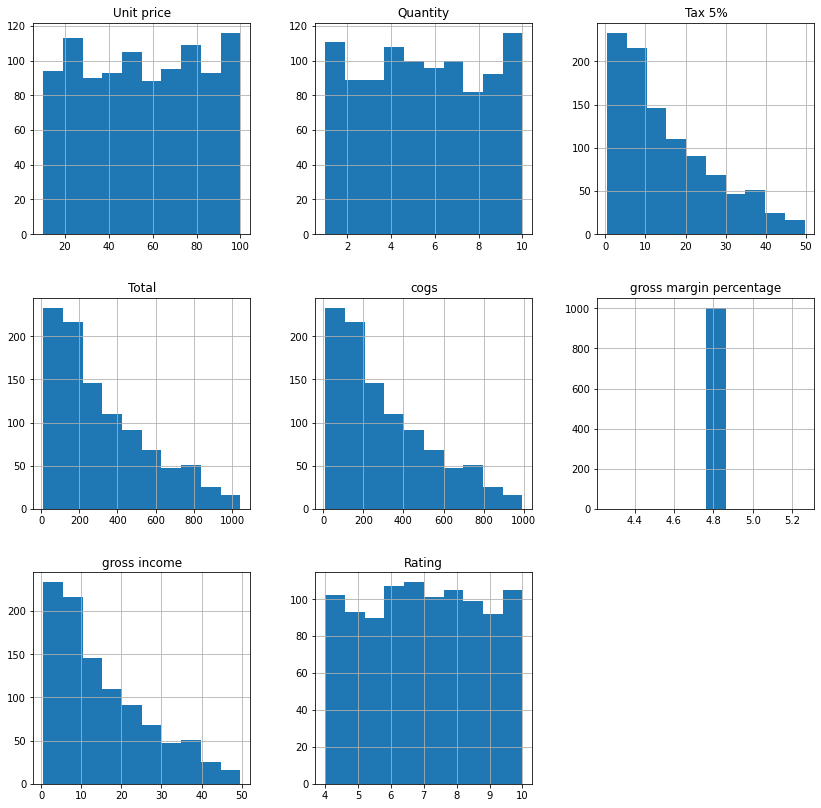

In [13]:
df.hist(figsize=(14,14))

As we can see 

Uniformly distributed: Unit Price, Quantity and Rating

Right Skew: Tax 5%, Total, Cogs



The tax graph shows that most of the tax collected falls between 0 and 20 but there are a few cases over 40. Same for CostOfGodsSold, Total graphs and Gross Income. All these graphs are highly correlated variables so we would not be supriced to see that they all follow almost identical distributions.

Gross margin percentage is of course a constant value

**Question 2:** Do aggregate sales numbers differ by much between branches?

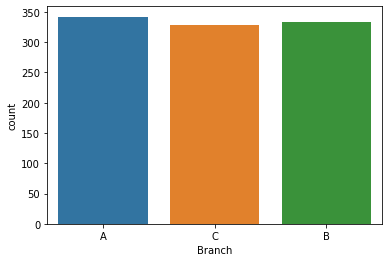

<Figure size 1152x576 with 0 Axes>

In [14]:
sns.countplot(x='Branch', data=df)
# Create a figure and set the size (width, height) in inches
plt.figure(figsize=(16, 8))  # Adjust the width and height as needed

plt.show()

In [15]:
df['Branch'].value_counts()

Branch
A    342
B    333
C    328
Name: count, dtype: int64

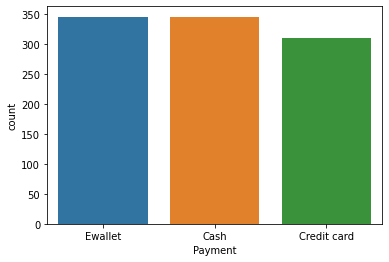

<Figure size 1152x576 with 0 Axes>

In [16]:
sns.countplot(x='Payment', data=df)
plt.figure(figsize=(16, 8))

plt.show()

We have looked at Univariate analysis which means looking at one variable at a time.

## Task 3: Bivariate Analysis

Bivariate Analysis is looking at 2 variables at a time

**Question 3:** Is there a relationship between gross income and customer ratings?

<Axes: xlabel='Rating', ylabel='gross income'>

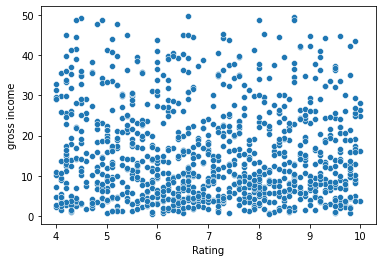

In [17]:
sns.scatterplot(x='Rating', y='gross income', data=df)

<Axes: xlabel='Rating', ylabel='gross income'>

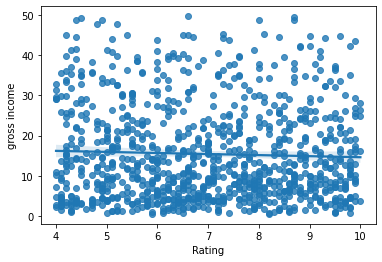

In [18]:
sns.regplot(x='Rating', y='gross income', data=df)

The trendline seems to be pretty flat.

This means that there doesn't seem to be any relationship between rating and gross income

<Axes: xlabel='Branch', ylabel='gross income'>

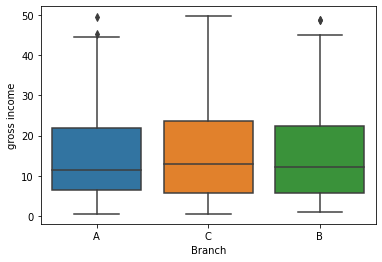

In [19]:
sns.boxplot(x='Branch', y='gross income', data=df)

For Branch A we see that the median line is about 12 , for B its about 13 and for C its again about 12 like branch A.

So no there doesn't seem to be much variation between Gross Income between Branches, at least at the aggregate level.

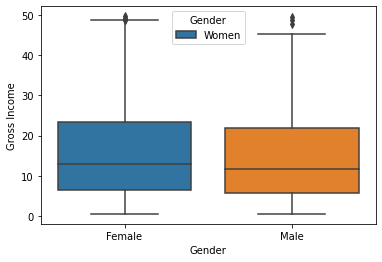

In [20]:
ax = sns.boxplot(x='Gender', y='gross income', data=df)
plt.xlabel('Gender')  # Label for the x-axis
plt.ylabel('Gross Income')  # Label for the y-axis
ax.legend(title='Gender', labels=['Women'])

plt.show()

It looks like men and women in this dataset spend about the same.

Perhaps at the 75th percentile women spend more than men.

**Question 4:** Is there a noticeable time trend in gross income?

In [21]:
df.head()
# we cannot use this dataframe to plot a lineplot for time vs gross as date is in datetime format
# this is because dates are repeated - they can be multiple customers at any given date 
# so we need to aggregate them  

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

In [22]:
df

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   
...                 ...    ...        ...           ...     ...   
2019-02-22  347-56-2442      A     Yangon        Normal    Male   
2019-02-18  849-09-3807      A     Yangon        Member  Female   
2019-02-18  849-09-3807      A     Yangon        Member  Female   
2019-03-10  745-74-0715      A     Yangon        Normal    Male   
2019-01-26  452-04-8808      B   Mandalay        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   
...                            ...         ...       ...      ...       ...   
2019-02-22      Home and lifestyle       65.82       1.0   3.2910   69.1110   
2019-02-18     Fashion accessories       88.34       7.0  30.9190  649.2990   
2019-02-18     Fashion accessories       88.34       7.0  30.9190  649.2990   
2019-03-10  Electronic accessories         NaN       2.0   5.8030  121.8630   
2019-01-26  Electronic accessories       87.08       NaN  30.4780  640.0380   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   
...           ...          ...     ...                      ...           ...   
2019-02-22  15:33         Cash   65.82                 4.761905        3.2910   
2019-02-18  13:28         Cash  618.38                 4.761905       30.9190   
2019-02-18  13:28         Cash  618.38                 4.761905       30.9190   
2019-03-10  20:46      Ewallet  116.06                 4.761905        5.8030   
2019-01-26  15:17         Cash  609.56                 4.761905       30.4780   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3  
...            ...  
2019-02-22     4.1  
2019-02-18     6.6  
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5  

[1003 rows x 16 columns]

In [33]:
df_copy = df.copy()
df_copy.head(2)

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-01-05  13:08  Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29     Cash   76.40                 4.761905        3.8200   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6

In [47]:
# Select only the numeric columns
numeric_columns = df_copy.select_dtypes(include=[int, float])

# Groupby the index and calculate the mean for numeric columns
result = numeric_columns.groupby(df_copy.index).mean()
result


# the other option was to drop the non numeric columns
# df_copy.drop(columns=['Invoice ID','Branch'], inplace=True)
# we need to drop the above columns because we dont want them aggregated, it can't be aggregated because they are strings


Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.454545  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  5.888889  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

89 rows means 89 different days

<Axes: xlabel='Date', ylabel='gross income'>

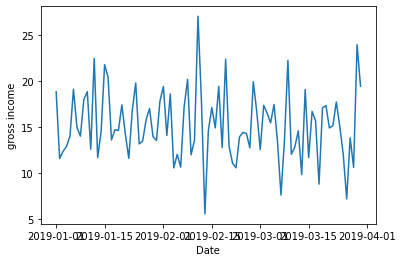

In [48]:
sns.lineplot(x=result.index, y = result['gross income'])

We  don't notice any time trend in this graph. It looks like it varies around the same mean.

There are some days where there are high numbers in gross income and some where there are low numbers in gross income.

But there doesn't seem to be any particular trend and this may be because we are looking only at 3 months worth of data.



c:\Users\Bluthund\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


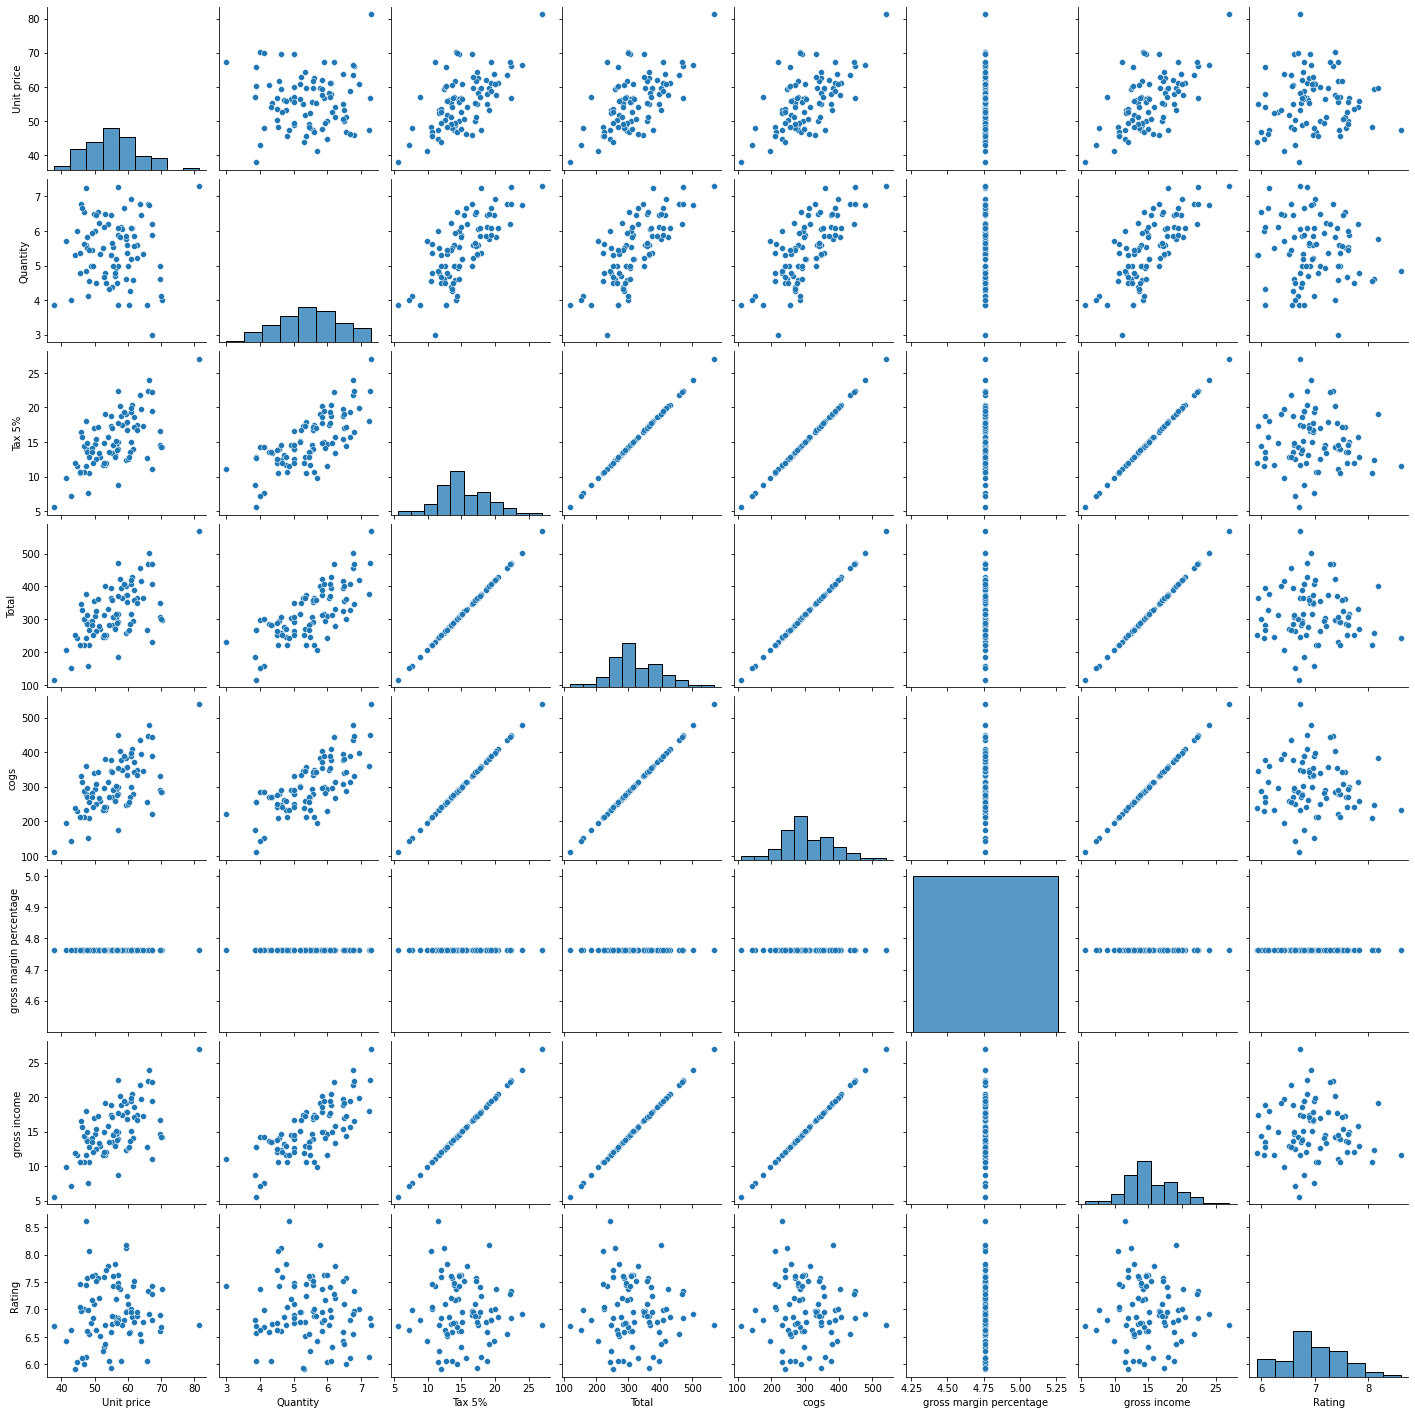

In [52]:
# There is a way of  plotting all the bivariate relationships:
# But I do not recommend it if you have large dataset or a lot of columns as it takes a lot of time and often causes errors

sns.pairplot(result)

### Task 4: Dealing With Duplicate Rows and Missing Values

In [54]:
df.duplicated()

# this basically gives us the index and the boolean T/F if that particular row is duplicated

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-02-22    False
2019-02-18    False
2019-02-18     True
2019-03-10     True
2019-01-26     True
Length: 1003, dtype: bool

In [55]:
df.duplicated().sum()

3

In [57]:
df[df.duplicated() == True]
# these particular rows are repeated more than once in our dataset

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

In [58]:
df.drop_duplicates(inplace=True)

In [60]:
df.duplicated().sum()

0

In [62]:
# Checking for missing values
df.isna().sum()


Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [64]:
df.isna().sum()/len(df)
# to check the ratio
# customer type 7.9%

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

<Axes: ylabel='Date'>

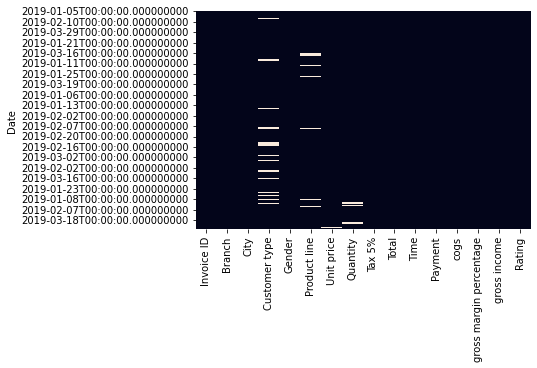

In [67]:
# a good way to visualize this is using seaborn's heatmat
sns.heatmap(df.isnull(), cbar=False)

index on the left side and all the values in black and the white lines are the values that are missing

In [71]:
# lets fill all the values that are missing by filling them with 0 or mean of each column

mean_values = df.select_dtypes(include=[int, float]).mean()


df.fillna(mean_values, inplace=True)

<Axes: ylabel='Date'>

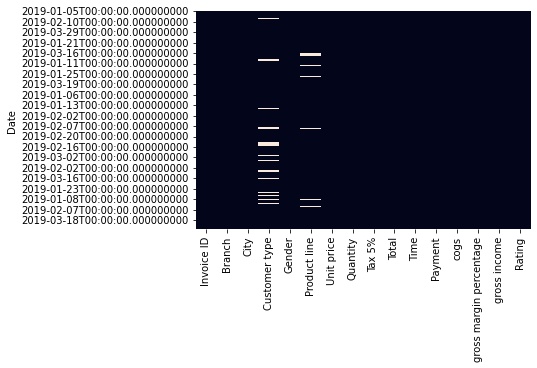

In [72]:
# a good way to visualize this is using seaborn's heatmat
sns.heatmap(df.isnull(), cbar=False)

As expected only numeric and float values where filled thats why we have the white lines left

But we can replace those missing values with the mode values

In [73]:
df.mode()

Invoice ID Branch    City Customer type  Gender         Product line  \
0    101-17-6199      A  Yangon        Normal  Female  Fashion accessories   
1    101-81-4070    NaN     NaN           NaN     NaN                  NaN   
2    102-06-2002    NaN     NaN           NaN     NaN                  NaN   
3    102-77-2261    NaN     NaN           NaN     NaN                  NaN   
4    105-10-6182    NaN     NaN           NaN     NaN                  NaN   
..           ...    ...     ...           ...     ...                  ...   
995  894-41-5205    NaN     NaN           NaN     NaN                  NaN   
996  895-03-6665    NaN     NaN           NaN     NaN                  NaN   
997  895-66-0685    NaN     NaN           NaN     NaN                  NaN   
998  896-34-0956    NaN     NaN           NaN     NaN                  NaN   
999  898-04-2717    NaN     NaN           NaN     NaN                  NaN   

     Unit price  Quantity   Tax 5%     Total   Time  Payment    cogs  \
0     55.700292      10.0   4.1540   87.2340  14:42  Ewallet   83.08   
1           NaN       NaN   4.4640   93.7440  19:48      NaN   89.28   
2           NaN       NaN   8.3770  175.9170    NaN      NaN  167.54   
3           NaN       NaN   9.0045  189.0945    NaN      NaN  180.09   
4           NaN       NaN  10.3260  216.8460    NaN      NaN  206.52   
..          ...       ...      ...       ...    ...      ...     ...   
995         NaN       NaN      NaN       NaN    NaN      NaN     NaN   
996         NaN       NaN      NaN       NaN    NaN      NaN     NaN   
997         NaN       NaN      NaN       NaN    NaN      NaN     NaN   
998         NaN       NaN      NaN       NaN    NaN      NaN     NaN   
999         NaN       NaN      NaN       NaN    NaN      NaN     NaN   

     gross margin percentage  gross income  Rating  
0                   4.761905        4.1540     6.0  
1                        NaN        4.4640     NaN  
2                        NaN        8.3770     NaN  
3                        NaN        9.0045     NaN  
4                        NaN       10.3260     NaN  
..                       ...           ...     ...  
995                      NaN           NaN     NaN  
996                      NaN           NaN     NaN  
997                      NaN           NaN     NaN  
998                      NaN           NaN     NaN  
999                      NaN           NaN     NaN  

[1000 rows x 16 columns]

In [74]:
df.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                           55.700292
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

In [78]:
df.fillna(df.mode().iloc[0], inplace=True)

In [80]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [83]:
dataset = pd.read_csv("supermarket_sales.csv")
prof = ProfileReport(dataset)
prof

Render HTML: 100%|██████████| 1/1 [00:04<00:00,  4.35s/it]


### Task 5: Correlation Analysis

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/